['2008-12-16.txt',
 'Chicago_Death.csv',
 'College_Graduation_or_More.xlsx',
 'Chicago_SES.csv',
 '2019-09-18.txt']

In [84]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [96]:
path = '/Users/Sarah/Documents/GitHub/Sarah-Discussion-Notebooks/Data'
filename = 'College_Graduation_or_More.xlsx'
chi_comm_area_boundries = os.path.join('Boundaries - Community Areas (current)','geo_export_8d7b31fe-6ff9-40e2-b9c6-91236f0af785.shp')
year = '2012-2016'
os.chdir(path)
        
def read_data(path, filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(path, filename))
    elif filename.endswith('.xls') or filename.endswith('.xlsx'):
        df = pd.read_excel(os.path.join(path, filename))
    else:
        print('unexpected file type in read_data')
    
    return df


def parse_chi_health_atlas_df(df, date_range):
    df = df[df['Year'] == date_range]
    df = df[['Geo_Group', 'Geo_ID', 'Percent']]
    
    return df

  
df = read_data(path, filename)
df = parse_chi_health_atlas_df(df, year)

In [97]:
df.head()

,Geo_Group,Geo_ID,Percent
56,1-Rogers Park,1,42.931552
57,2-West Ridge,2,39.500142
58,3-Uptown,3,54.078343
59,4-Lincoln Square,4,60.731151
60,5-North Center,5,69.316564


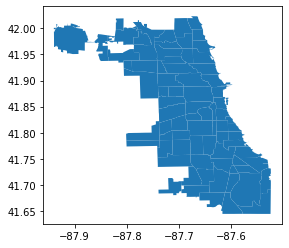

In [78]:
df_shp = geopandas.read_file(chi_comm_area_boundries)
df_shp.plot();
# Cite: https://geopandas.org/mapping.html

In [81]:
df_shp.head(3)

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."


In [79]:
use_df = df.merge(df_shp, left_on = 'Geo_ID', right_on = 'area_numbe', how = 'inner')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [39]:
df_shp.dtypes

area           float64
area_num_1      object
area_numbe      object
comarea        float64
comarea_id     float64
community       object
perimeter      float64
shape_area     float64
shape_len      float64
geometry      geometry
dtype: object

In [98]:
df.dtypes

Geo_Group     object
Geo_ID         int64
Percent      float64
dtype: object

In [45]:
df_shp['area_num_1'] = df_shp['area_num_1'].astype(int)
#Cite: https://datatofish.com/string-to-integer-dataframe/
df_shp.dtypes

In [82]:
df_shp.head(3)

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."


In [49]:
use_df = df.merge(df_shp, left_on = 'Geo_ID', right_on = 'area_num_1', how = 'inner')

In [83]:
use_df.head(3)

,Category,SubCategory,Indicator,Year,Geography,Geo_Group,Geo_ID,Demography,Demo_Group,Number,...,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,Social and Economic Factors,Education,College graduation or more,2012-2016,Community Area,1-Rogers Park,1,NaN,NaN,16320,...,0.0,1,1,0.0,0.0,ROGERS PARK,0.0,5.125990e+07,34052.397576,"POLYGON ((-87.65456 41.99817, -87.65574 41.998..."
1,Social and Economic Factors,Education,College graduation or more,2012-2016,Community Area,2-West Ridge,2,NaN,NaN,19408,...,0.0,2,2,0.0,0.0,WEST RIDGE,0.0,9.842909e+07,43020.689458,"POLYGON ((-87.68465 42.01948, -87.68464 42.019..."
2,Social and Economic Factors,Education,College graduation or more,2012-2016,Community Area,3-Uptown,3,NaN,NaN,24491,...,0.0,3,3,0.0,0.0,UPTOWN,0.0,6.509564e+07,46972.794555,"POLYGON ((-87.64102 41.95480, -87.64400 41.954..."


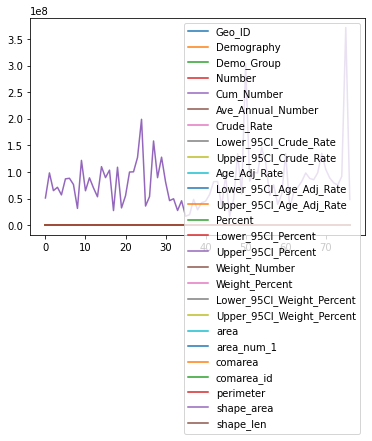

In [66]:
use_df.plot();

In [67]:
use_gdf = geopandas.GeoDataFrame(use_df)

<AxesSubplot:>

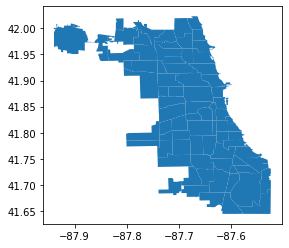

In [69]:
use_gdf.plot();

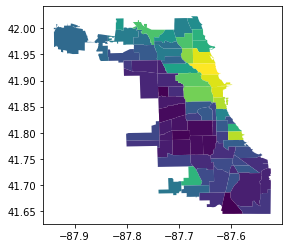

In [70]:
use_gdf.plot(column = 'Percent');

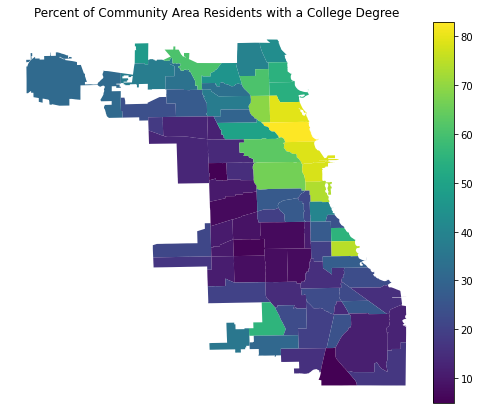

In [75]:
fig, ax = plt.subplots(figsize=(8,8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

ax = use_gdf.plot(ax=ax, column='Percent', legend=True, cax=cax)

ax.axis('off')
ax.set_title('Percent of Community Area Residents with a College Degree');

In [160]:
#from collections import OrderedDict

ModuleNotFoundError: No module named 'pysal'

In [150]:
#cmaps = OrderedDict()


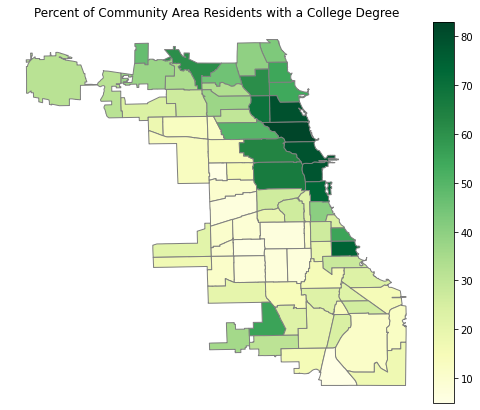

In [162]:
fig, ax = plt.subplots(figsize=(8,8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

ax = use_gdf.plot(ax=ax, column='Percent', cmap = 'YlGn', edgecolor='grey',
                  legend=True, cax=cax)

ax.axis('off')
ax.set_title('Percent of Community Area Residents with a College Degree');

# Cite: https://geopandas.org/mapping.html
# Cite: https://matplotlib.org/tutorials/colors/colormaps.html

In [209]:
uni_df = pd.DataFrame(
        {'University': ['University of Chicago', 'Loyola University', 'University of Illinois -Chicago'],
         'Longitude': [-87.599724, -87.6578, -87.6496],
         'Latitude': [41.789722, 41.9999, 41.8696]})

In [210]:
uni_gdf = geopandas.GeoDataFrame(uni_df, 
                                 geometry=geopandas.points_from_xy(uni_df['Longitude'], uni_df['Latitude'])) 

<AxesSubplot:>

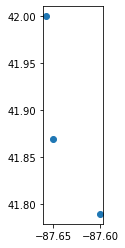

In [211]:
uni_gdf.plot()

In [212]:
print(uni_gdf.crs)

None


In [213]:
df_shp.crs

None


{'init': 'epsg:4326'}

In [214]:
uni_gdf = geopandas.GeoDataFrame(uni_df, 
                                 geometry=geopandas.points_from_xy(uni_df['Longitude'], uni_df['Latitude']), 
                                 crs = 'epsg:4326')
# Cite: https://geopandas.org/projections.html

Text(0.5, 1.0, 'Percent of Community Area Residents with a College Degree')

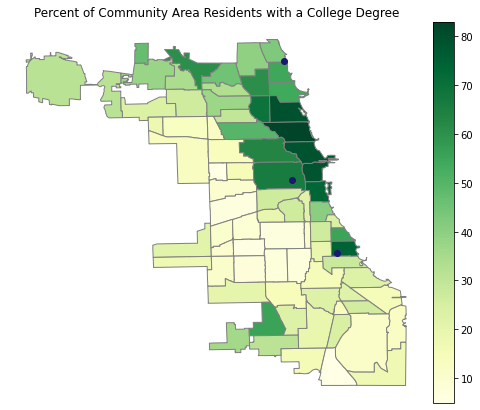

In [222]:
fig, ax = plt.subplots(figsize=(8,8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

ax = use_gdf.plot(ax=ax, column='Percent', cmap = 'YlGn', edgecolor='grey',
                  legend=True, cax=cax)


uni_gdf.plot(ax=ax, color='midnightblue')


ax.axis('off')
ax.set_title('Percent of Community Area Residents with a College Degree')

# Cite: https://geopandas.org/mapping.html
# Cite: https://matplotlib.org/tutorials/colors/colormaps.html
# Cite: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

TypeError: cannot unpack non-iterable numpy.float64 object

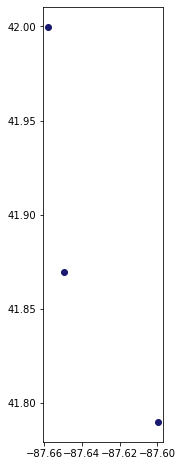

In [229]:
fig, ax = plt.subplots(figsize=(8,8))


ax = uni_gdf.plot(ax=ax, color='midnightblue')


x = 'Longitude'
y = 'Latitude'

for i, txt in enumerate(uni_gdf['University']):
    #print(i, txt)
    #print(uni_gdf[x][i], uni_gdf[y][i])
    ax.annotate(txt, uni_gdf[x][i], uni_gdf[y][i])

# Cite: https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point

### Let's clean it up